# Machine Learning

In [4]:
import numpy as np

In [3]:
from sklearn import tree, linear_model, datasets
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Linear Regression

### Prepare data

    The function being used is y = x/2 + sin(x) + c
    where c is the gaussian noise

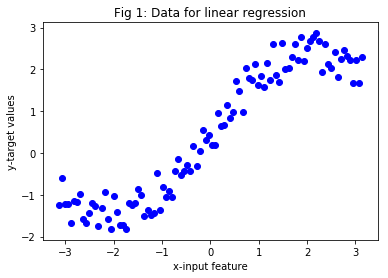

In [4]:
number = 100
x = np.linspace(-np.pi, np.pi, number)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color = 'blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

### Split the data

    We do a 70%-15%-15% random split of the data between the training, validation and test sets respectively.

In [5]:
random_indices = np.random.permutation(number)
#training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]

#validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]

#test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

### Fit a line to the data
    
    We will fit a line to our data using sklearn.linear_model.LinearRegression

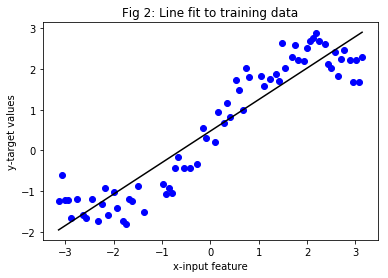

In [6]:
model = linear_model.LinearRegression()

x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

# Fit the line into the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

#Plot the line
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x.reshape(len(x), 1), model.predict(x.reshape(len(x), 1)), color = 'black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

### Evaluate the model
    
    We evaluate the model using mean squared error method.

In [7]:
mean_val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val), 1)))**2)

In [8]:
mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test), 1)))**2)

In [9]:
print("Mean validation error: ", mean_val_error)
print("Mean test error: ", mean_test_error)

Mean validation error:  3.876324811596651
Mean test error:  3.3158839811102423


## 2. Logistic Regression

### Prepare Data
    We will demonstrate this with the example of classifying a part of the Iris dataset.

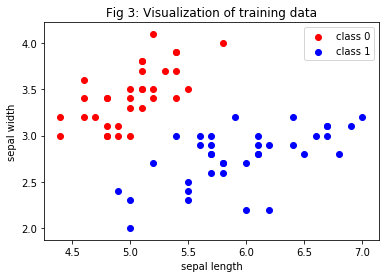

In [25]:
iris = datasets.load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target
#The first 50 samples are class 0 and the next 50 samples are class 1
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

#Visualizing the training data
X_class0 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) #Picking only the first two classes
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int)
X_class1 = np.asmatrix([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter([X_class0[:,0]], [X_class0[:,1]],color='red')
plt.scatter([X_class1[:,0]], [X_class1[:,1]],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()

### Fit logistic regression model
    Now we fit a linear decision boundary through the feature space that separates the two classes well. We use sklearn.linear_model.LogisticRegression.

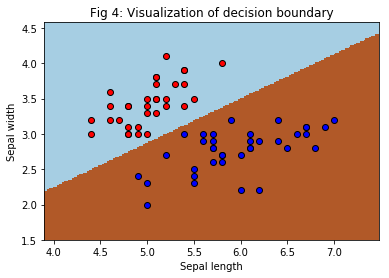

In [27]:
model = linear_model.LogisticRegression(C=1e5)#C is the inverse of the regularization factor
full_X = np.concatenate((X_class0,X_class1),axis=0)
full_Y = np.concatenate((Y_class0,Y_class1),axis=0)
model.fit(full_X,full_Y)

# Display the decision boundary
#(Visualization code taken from: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

h = .02  # step size in the mesh
x_min, x_max = full_X[:, 0].min() - .5, full_X[:, 0].max() + .5
y_min, y_max = full_X[:, 1].min() - .5, full_X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #predict for the entire mesh to find the regions for each class in the feature space

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter([X_class0[:, 0]], [X_class0[:, 1]], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter([X_class1[:, 0]], [X_class1[:, 1]], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

### Evaluate the model

In [29]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i]!=y_val[i]:
        validation_misclassification_percentage+=1
validation_misclassification_percentage *= 100/len(y_val)
print('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print('test misclassification percentage =', test_misclassification_percentage, '%')


validation misclassification percentage = 6.666666666666667 %
test misclassification percentage = 0.0 %


## 3. Decision Tree Regression

### Prepare Data
    
    We use the same data as in Linear regression

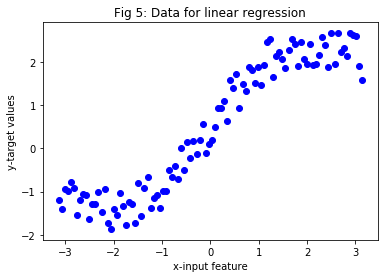

In [32]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='blue') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

### Split the data into training, validation and test set

In [34]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

### Fit a line to the data

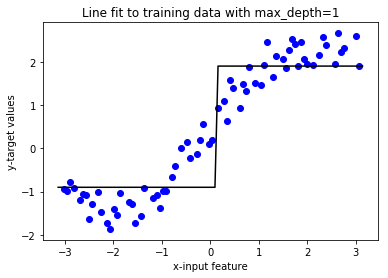

Training MSE:  0.32913903447899556 
Validation MSE:  0.40212267980151317 
Test MSE:  0.25553842622385914


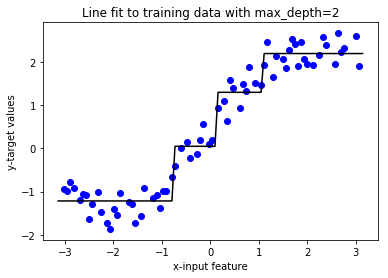

Training MSE:  0.08894229801131381 
Validation MSE:  0.16716340543964936 
Test MSE:  0.1632784503089534


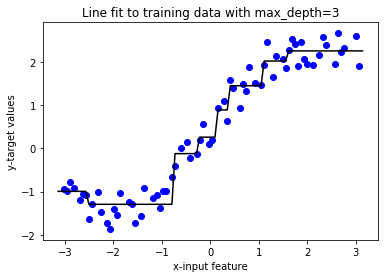

Training MSE:  0.06439076202738588 
Validation MSE:  0.13993048471582553 
Test MSE:  0.1827629789634388


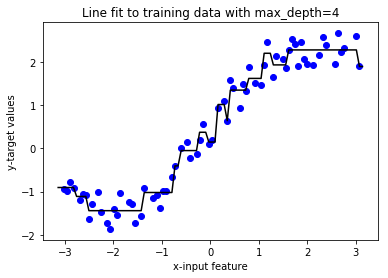

Training MSE:  0.042997008156888304 
Validation MSE:  0.12351711901188743 
Test MSE:  0.13317617242569202


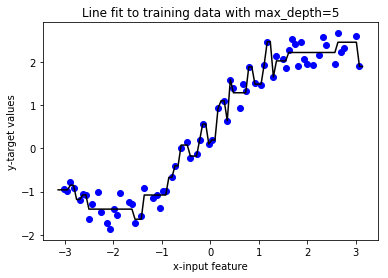

Training MSE:  0.02861248860181348 
Validation MSE:  0.1493239492820541 
Test MSE:  0.11649225137621873


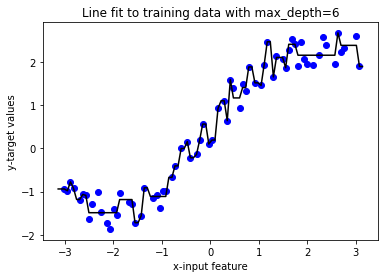

Training MSE:  0.02029845657973787 
Validation MSE:  0.17614609564549005 
Test MSE:  0.11940702012174029


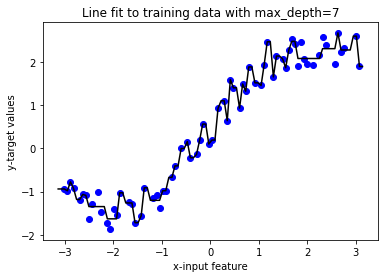

Training MSE:  0.011948335586863978 
Validation MSE:  0.161730878465919 
Test MSE:  0.10299495893300316


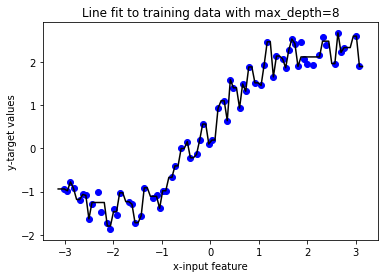

Training MSE:  0.004734238781602806 
Validation MSE:  0.1889438790335309 
Test MSE:  0.10982494124967296


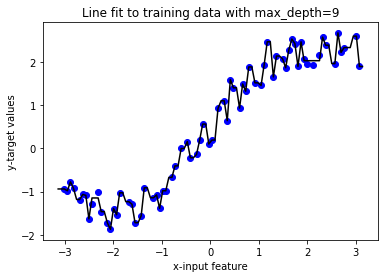

Training MSE:  0.0010060196123412623 
Validation MSE:  0.1887742781937495 
Test MSE:  0.11796865490725603


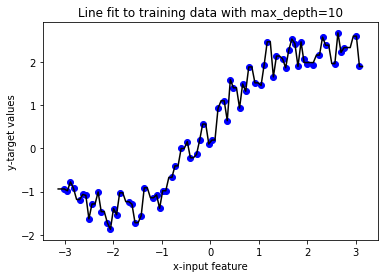

Training MSE:  0.00013338990231229097 
Validation MSE:  0.1899286325872222 
Test MSE:  0.120394809317281


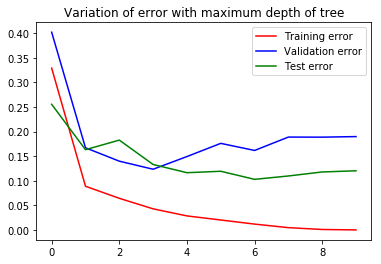

In [35]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='blue')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='black')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()